In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
% matplotlib inline

In [2]:
data = datasets.load_iris()

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
label = {1: 'setosa', -1: 'vesicolor'}

In [5]:
df = pd.concat([pd.DataFrame(data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']),
                pd.DataFrame(data.target, columns=['type'])], axis=1)
df = df[df.type.isin((0, 1))]
df['type'] = df.type.map({0: 1, 1: -1})

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


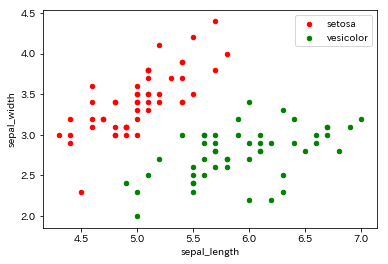

In [7]:
# 判別用のグラフ
fig, ax = plt.subplots()
df[df.type == 1].plot.scatter(x='sepal_length', y='sepal_width', ax=ax, color='r', label=label[1])
df[df.type == -1].plot.scatter(x='sepal_length', y='sepal_width', ax=ax, color='g', label=label[-1])

In [8]:
class Perceptron(object):
    '''
    Parameters:
        eta(float): learning rate, 0 < eta <= 1.0
        n_iter(int): number of training
    Examples:
        >>> load_detailed_sso(
        >>>     student_ids=student_ids, year=2017, grade_id=31)
    '''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        '''
        You can fit the training data to this model, "Pereptron".
        Parameters:
            X: array like, shape = [n_samples, n_features]
            Y: array like, shape = [n_samples]
        '''
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter): 
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

In [9]:
p = Perceptron().fit(X=df.iloc[:, :-1].as_matrix(), y=df.iloc[:, -1])

In [10]:
df['predicted_type'] = p.predict(df.iloc[:, :-1].as_matrix())

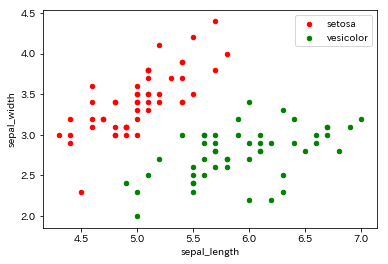

In [11]:
fig, ax = plt.subplots()
df[df.predicted_type == 1].plot.scatter(x='sepal_length', y='sepal_width', ax=ax, color='r', label=label[1])
df[df.predicted_type == -1].plot.scatter(x='sepal_length', y='sepal_width', ax=ax, color='g', label=label[-1])

In [12]:
# modelの評価関数をつくる
def evaluate_accuracy(*, y, y_predicted):
    df = pd.concat([pd.Series(y, name='y'), pd.Series(y_predicted, name='y_predicted')],
                  axis=1)
    recall = len(df[(df.y == 1) & (df.y_predicted == 1)]) / len(df[df.y == 1])
    precision = len(df[(df.y == 1) & (df.y_predicted == 1)]) / len(df[df.y_predicted == 1])
    accuracy = len(df[df.y == df.y_predicted]) / len(df)
    F1 = 2 * precision * recall / (precision + recall)
    return pd.DataFrame(
        {'recall': recall, 'precision': precision, 'accuracy': accuracy, 'F1': F1}, index=['score']).T

In [13]:
y_true = [1, 1, 1, 0, 0]
y_pred = [1, 1, 0, 0, 0]
evaluate_accuracy(y=y_true, y_predicted=y_pred)

,score
F1,0.800000
accuracy,0.800000
precision,1.000000
recall,0.666667


In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         2
          1       1.00      0.67      0.80         3

avg / total       0.87      0.80      0.80         5



In [16]:
# ワインのデータセットを用意する
wine_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
len(wine_df)

1599

In [18]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
from itertools import combinations
from scipy.stats import pearsonr

In [20]:
# quatlityと各説明変数について、pearsonの積率相関係数を算出
pearson_r = pd.DataFrame(columns=['r', 'p'])
for col in wine_df.columns[0: -1]:
    r, p = pearsonr(wine_df[col], wine_df.quality)
    pearson_r.loc[col] = [round(r, 2), round(p, 3)]
pearson_r.sort_values(by='r', ascending=False)

,r,p
alcohol,0.48,0.000
sulphates,0.25,0.000
citric acid,0.23,0.000
fixed acidity,0.12,0.000
residual sugar,0.01,0.583
free sulfur dioxide,-0.05,0.043
pH,-0.06,0.021
chlorides,-0.13,0.000
density,-0.17,0.000
total sulfur dioxide,-0.19,0.000


In [21]:
wine_df.quality = wine_df.quality.apply(lambda x: 1 if x >= 6 else 0)
len(wine_df[wine_df.quality == 1])

855

In [22]:
# まず単純に、モデルをfitさせて予測してみる。Random Forestを使う
from sklearn.ensemble import RandomForestClassifier

In [23]:
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[:, -1]
rfc0 = RandomForestClassifier()
rfc0.fit(X, y)
rfc0.predict(X)

array([0, 0, 0, ..., 1, 0, 1])

In [24]:
evaluate_accuracy(y=y.values, y_predicted=rfc0.predict(X))

,score
F1,0.989412
accuracy,0.988743
precision,0.995266
recall,0.983626


In [25]:
# datasetをtraining dataset, test datasetに分ける。
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test =\
    train_test_split(wine_df.iloc[:, :-1], wine_df.iloc[:, -1], 
                     test_size=0.2, shuffle=True, random_state=42)

In [27]:
# train dataのquality 1の数
y_train.sum()

676

In [28]:
# ①xgboost
from xgboost.sklearn import XGBClassifier

In [29]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [30]:
y_predicted = xgb1.predict(X_test)
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0,

In [31]:
evaluate_accuracy(y=y_test.values, y_predicted=y_predicted)

,score
F1,0.837466
accuracy,0.815625
precision,0.826087
recall,0.849162


In [32]:
# パラメータ調整してみる
xgb2 = XGBClassifier(max_depth=8, min_child_weight=1, gamma=0.4,
                   colsample_bytree=0.75, subsample=0.85, reg_alpha=0.001)
xgb2.fit(X_train, y_train)
evaluate_accuracy(y=y_test.values, y_predicted=xgb2.predict(X_test))

,score
F1,0.822222
accuracy,0.800000
precision,0.817680
recall,0.826816


In [33]:
# ②LogisticRegression
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
evaluate_accuracy(y=y_train.values, y_predicted=lr.predict(X_train))

,score
F1,0.763473
accuracy,0.752932
precision,0.772727
recall,0.754438


In [35]:
# ③Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
evaluate_accuracy(y=y_train.values, y_predicted=lr.predict(X_train))

,score
F1,0.763473
accuracy,0.752932
precision,0.772727
recall,0.754438


In [36]:
# ④SVC
from sklearn.svm import SVC

In [37]:
svc = SVC()
svc.fit(X_train, y_train)
evaluate_accuracy(y=y_test.values, y_predicted=svc.predict(X_test))

,score
F1,0.724719
accuracy,0.693750
precision,0.728814
recall,0.720670


In [38]:
# 交差検証を行う
from sklearn.model_selection import KFold

In [39]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [40]:
rfc2 = RandomForestClassifier()
result = pd.DataFrame()
for n, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    rfc.fit(X_train, y_train)
    res = evaluate_accuracy(
        y=y_test.values, y_predicted=rfc.predict(X_test)).rename(columns={'score': n})
    result = pd.concat([result, res], axis=1)

In [41]:
result

,0,1,2,3,4
F1,0.809668,0.796512,0.800000,0.819876,0.781818
accuracy,0.803125,0.781250,0.784375,0.818750,0.774295
precision,0.842767,0.752747,0.831325,0.857143,0.826923
recall,0.779070,0.845679,0.770950,0.785714,0.741379


In [42]:
result.mean(axis=1)

F1           0.801575
accuracy     0.792359
precision    0.822181
recall       0.784558
dtype: float64